<a href="https://colab.research.google.com/github/lmarcos28/Energy-prediction-model---Heating-Load-HL-y-Cooling-Load-CL-/blob/main/Energy_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd   #Para el manejo de tablas
from sklearn.model_selection import train_test_split    #Para dividir datos de entrenamiento y prueba
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


# **Cargar el archivo y visualización preliminar primeras filas**

In [46]:
data = pd.read_excel ("https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx")
print(data.head(10))
print(data.shape)
print(data.columns)
print(data.info())

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
5  0.90  563.5  318.5  122.50  7.0   3  0.0   0  21.46  25.38
6  0.90  563.5  318.5  122.50  7.0   4  0.0   0  20.71  25.16
7  0.90  563.5  318.5  122.50  7.0   5  0.0   0  19.68  29.60
8  0.86  588.0  294.0  147.00  7.0   2  0.0   0  19.50  27.30
9  0.86  588.0  294.0  147.00  7.0   3  0.0   0  19.95  21.97
(768, 10)
Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2 

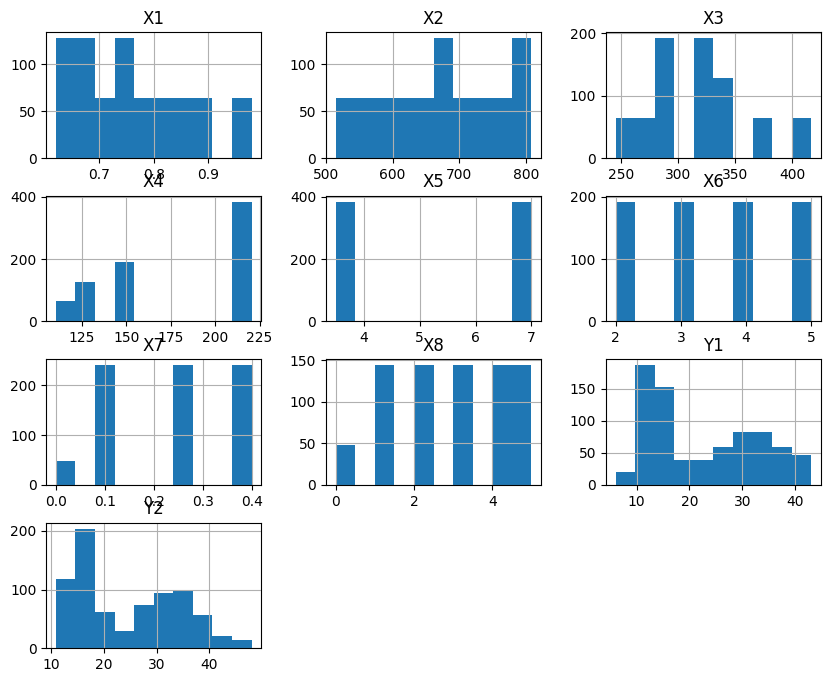

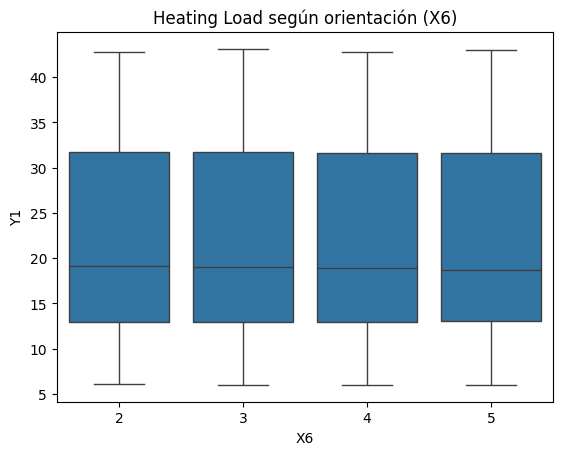

In [48]:
#VIsualización del histograma de cada variable, no es necesario pero es útil saber la dsitribución
data.hist(figsize=(10,8))
plt.show()
sns.boxplot(x="X6", y="Y1", data=data)
plt.title("Heating Load según orientación (X6)")
plt.show()


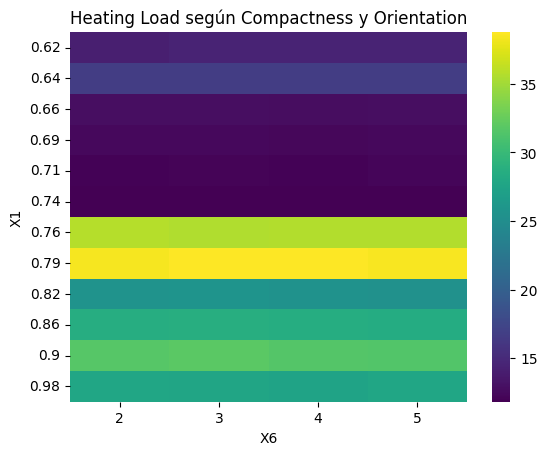

In [50]:
pivot_table = data.pivot_table(
    values="Y1",       # qué valor mostrar (Heating Load)
    index="X1",        # filas (Relative Compactness)
    columns="X6",      # columnas (Orientation)
    aggfunc="mean"     # qué calcular (media)
)

sns.heatmap(pivot_table, cmap="viridis")
plt.title("Heating Load según Compactness y Orientation")
plt.show()



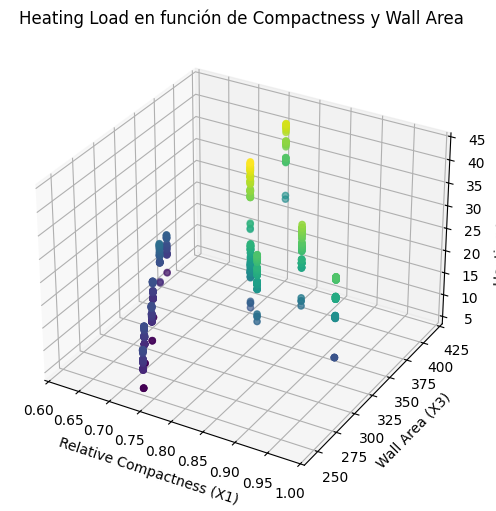

In [52]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(data["X1"], data["X3"], data["Y1"], c=data["Y1"], cmap="viridis")

ax.set_xlabel("Relative Compactness (X1)")
ax.set_ylabel("Wall Area (X3)")
ax.set_zlabel("Heating Load (Y1)")
plt.title("Heating Load en función de Compactness y Wall Area")
plt.show()



# **Separación de características y objetivo**

In [38]:
x = data.iloc[:,0:8]
y = data["Y1"]  #Calefacción

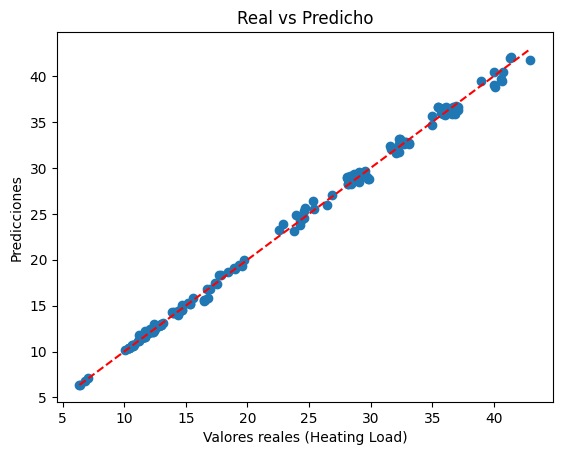

In [41]:
#División de los datos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Entrenamiento del modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

#Predicción
y_pred = model.predict(x_test)

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales (Heating Load)")
plt.ylabel("Predicciones")
plt.title("Real vs Predicho")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')  # línea de referencia
plt.show()


# **Evaluación del modelo**

In [42]:
# Error absoluto medio
mae = mean_absolute_error(y_test, y_pred)

# R²
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")


MAE: 0.35
R²: 1.00


# **PRUEBA CON UN NUEVO EDIFICIO**

In [43]:
# Ejemplo: edificio con estas características
# [Relative Compactness, Surface Area, Wall Area, Roof Area,
# Overall Height, Orientation, Glazing Area, Glazing Area Distribution]

sample = [[0.90, 700, 300, 200, 3.5, 2, 0.25, 3]]

# Predicción del modelo
prediction = model.predict(sample)

print(f"Predicción de Heating Load para el edificio nuevo: {prediction[0]:.2f}")


Predicción de Heating Load para el edificio nuevo: 20.45


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
